In [26]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

In [31]:
image=cv2.imread(r'C:\Users\merug\Downloads\1.jpg')

In [32]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

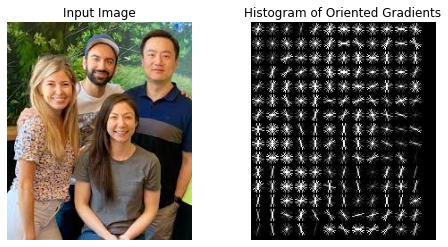

In [33]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True )
#fd is used to features discription

#plot the image
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis("off")
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")
plt.show()

In [34]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

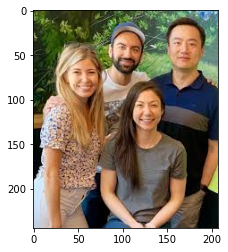

In [35]:
image=cv2.imread(r'Downloads\1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [36]:
#detects no of faces
face_location=face_recognition.face_locations(image)
no_of_faces=len(face_location)
print("Found {} faces(s) input image".format(no_of_faces))

Found 4 faces(s) input image


a face is located at pixel location Top:109 , Right:98,Bottom:145,Left:134
a face is located at pixel location Top:153 , Right:26,Bottom:189,Left:62
a face is located at pixel location Top:37 , Right:58,Bottom:73,Left:94
a face is located at pixel location Top:89 , Right:30,Bottom:125,Left:66


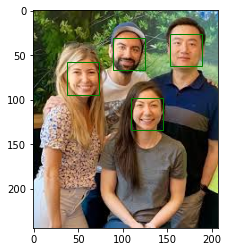

In [37]:
#get axis handle
plt.imshow(image)
ax=plt.gca()
#repeat for once all faces found
for face_location in face_location:
    #print locations of each faces in the image  each cordinates in(top,bottom,left,right)order
    t,r,b,l=face_location
    x,y,w,h=l,t,r,b
    print("a face is located at pixel location Top:{} , Right:{},Bottom:{},Left:{}".format(x,y,w,h))
    
    
    #draw rectangle around face
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='green')
    ax.add_patch(rect)
#sshow output
plt.show()


# Detect the  test image from the database

In [81]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [82]:
image=cv2.imread(r'C:\Users\merug\Downloads\rock.jpg')
test_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread(r'C:\Users\merug\Downloads\2.jpg')
im_2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread(r'C:\Users\merug\Downloads\3.jpg')
im_3=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread(r'C:\Users\merug\Downloads\4.jpg')
im_4=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [83]:
test_img=face_recognition.face_encodings(test_img)[0]
im_2=face_recognition.face_encodings(im_2)[0]
#im_3=face_recognition.face_encodings(im_3)[0]
im_4=face_recognition.face_encodings(im_4)[0]

#create a database
known_face_encodings=[
    test_img,
    im_2,
    #im_3,
    im_4
]


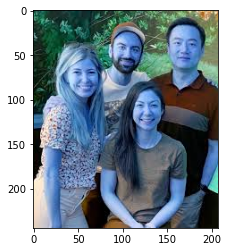

In [89]:
#load unknow image to identify it exxist in database
image=cv2.imread(r'C:\Users\merug\Downloads\1.jpg')
unknown_i=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

unknown_face_encodings=face_recognition.face_encodings(unknown_i)

In [90]:
#scipy for calculating ecudian distance
from scipy.spatial import distance
#there may be more than one person in image so loop required
#test if unkown_i matches in database
#result=face_recognition.compare_faces(know_face_encoding,unkown_face_encoding,tolerence=0.6)
for unknown_face_encoding in unknown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)
        print("distance",d)
        results.append(d)
        
        
        
        
    threshold=0.6
    results=np.array(results)<=threshold
    name='unknown'
    if results[0]:
        name='test_image'
    elif results[1]:
        name='im_2'
    elif results[2]:
        name='im_4'
    print(f"Found {name} is in the photo!")
    

distance 0.897156020897896
distance 0.9389345172998005
distance 0.9221383810044381
Found unknown is in the photo!
distance 0.7944367360916726
distance 0.812852054899531
distance 0.907608196274355
Found unknown is in the photo!
distance 0.7802407220928617
distance 0.8486515110253727
distance 0.7932814692281236
Found unknown is in the photo!
distance 0.8004287138512026
distance 0.8135744446806494
distance 0.8642429354044975
Found unknown is in the photo!


# Facial Land Marks

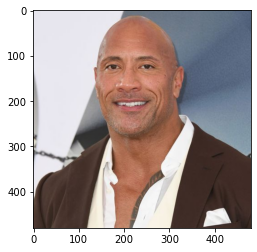

In [93]:
image=cv2.imread(r'C:\Users\merug\Downloads\rock.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [96]:
facial_landmarks_list=face_recognition.face_landmarks(image)


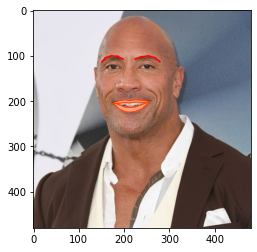

In [101]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()
for face_landmarks in facial_landmarks_list:
    left_eyebrow_pts=face_landmarks['left_eyebrow']
    pre_x,pre_y=left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y
        
        
        
    right_eyebrow_pts=face_landmarks['right_eyebrow']
    pre_x,pre_y=right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y
    
    
    
    p=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)
    p=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)
    
plt.show()